## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1,l2,l1_l2
from keras.layers import Dropout, BatchNormalization

def build_mlp(input_shape, output_unit=10, num_neurous=[512, 256, 128], l2_ratio=1e-4, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neurous):
        if i == 0:
            x = keras.layers.Dense(units=n, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
            
        else:
            x = keras.layers.Dense(units=n, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units=output_unit,
                            activation='softmax',
                            name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer],
                               outputs=[out])
    
    return model
            
        

In [6]:
BATCH_SIZE = 1000
EPOCH = 50
LEARNING_RATE = 1e-3
MOMENTUM = 0.95


In [7]:
results = {}
model = build_mlp(input_shape= x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, decay=0)
model.compile(loss= 'categorical_crossentropy', metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train,y_train,
         epochs=EPOCH,
         batch_size=BATCH_SIZE,
         validation_data=[x_test,y_test],
         shuffle=True)

results['optimi']={'train_loss' : model.history.history['loss'],
'val_loss' : model.history.history['val_loss'],
'train_acc' : model.history.history['accuracy'],
'val_acc' : model.history.history['val_accuracy']}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0   

50000/50000 [==============================] - 7s 147us/step - loss: 1.4451 - accuracy: 0.5335 - val_loss: 1.4863 - val_accuracy: 0.5174
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4419 - accuracy: 0.5327 - val_loss: 1.4829 - val_accuracy: 0.5225
Epoch 45/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4365 - accuracy: 0.5351 - val_loss: 1.4963 - val_accuracy: 0.5206
Epoch 46/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.4293 - accuracy: 0.5385 - val_loss: 1.4792 - val_accuracy: 0.5229
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4234 - accuracy: 0.5385 - val_loss: 1.4763 - val_accuracy: 0.5285
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4229 - accuracy: 0.5387 - val_loss: 1.4771 - val_accuracy: 0.5277
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4106 - accuracy: 0.5449 - val_loss:

In [8]:
# non-optimi
def build_mlp2(input_shape, output_unit=10, num_neurous=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n in enumerate(num_neurous):
        if i == 0:
            x = keras.layers.Dense(units=n, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1)
                                   )(input_layer)
            
        else:
            x = keras.layers.Dense(units=n, 
                                   activation='relu',
                                   name='hidden_layer'+str(i+1)
                                   )(x)
            
    out = keras.layers.Dense(units=output_unit,
                            activation='softmax',
                            name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer],
                               outputs=[out])
    
    return model

#parameter
BATCH_SIZE = 500
EPOCH = 50
LEARNING_RATE = 1e-3
MOMENTUM = 0.95

#build model
keras.backend.clear_session() # 把舊的 Graph 清掉
model2 = build_mlp2(input_shape= x_train.shape[1:])
model2.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, decay=0)
model2.compile(loss= 'categorical_crossentropy', metrics=["accuracy"], optimizer=optimizer)

model2.fit(x_train,y_train,
         epochs=EPOCH,
         batch_size=BATCH_SIZE,
         validation_data=[x_test,y_test],
         shuffle=True)

results['non_optimi']={'train_loss' : model2.history.history['loss'],
'val_loss' : model2.history.history['val_loss'],
'train_acc' : model2.history.history['accuracy'],
'val_acc' : model2.history.history['val_accuracy']}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 153u

Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1680 - accuracy: 0.5883 - val_loss: 1.3648 - val_accuracy: 0.5135
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.1657 - accuracy: 0.5896 - val_loss: 1.3499 - val_accuracy: 0.5209


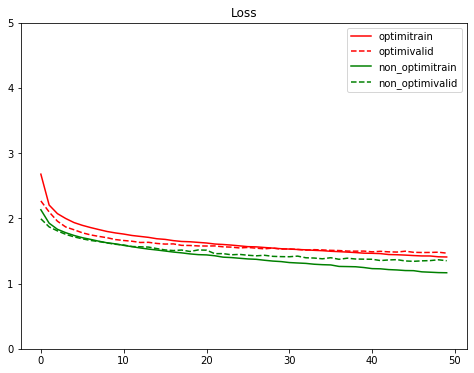

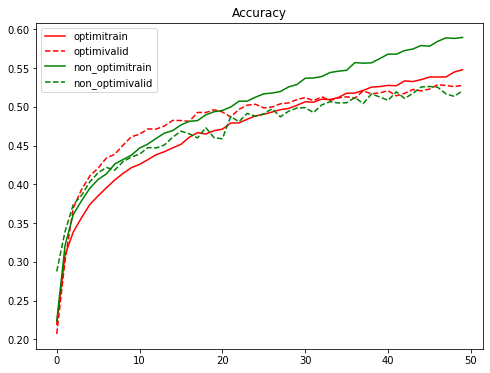

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['val_loss'])),results[cond]['val_loss'], '--', label=cond+'valid', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond+'train', color=color_bar[i])
    plt.plot(range(len(results[cond]['val_acc'])),results[cond]['val_acc'], '--', label=cond+'valid', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()